In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
# input_str = clean_text_for_pattern_letter(template_str, out_len=5000)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
111748
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [110]:
def predict_train(input_str, letters, max_index: int = 4,):
    WIN: dict[str, dict[str, int]] = {}
    HW: dict[str, int] = {}
    W: dict[str, dict[str, int]] = {}

    IDX: list = []

    for letter in letters:
        WIN.setdefault(letter, {})

        for idx in range(max_index):
            WIN[letter].setdefault(idx, 0)
    
    prev_index = 0

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            WIN[inp][prev_index] += 1
            continue
        
        IDX.append(prev_index)

        prev_idx = inp_idx - 1
        prev_inp = input_str[prev_idx]

        key_HW = prev_inp + str(prev_index) + ':' + inp

        inp_min_index = 0
        if HW.get(key_HW, -1) != -1:
            inp_min_index = HW[key_HW]
        else:
            inp_min_index = min(WIN[inp], key=WIN[inp].get)
            WIN[inp][inp_min_index] += 1

            HW.setdefault(key_HW, inp_min_index)

        key_I = prev_inp + str(prev_index)
        key_O = inp + str(inp_min_index)
        W.setdefault(key_I, {})
        W[key_I].setdefault(key_O, 0)
        W[key_I][key_O] += 1

        # recursion
        prev_index = inp_min_index
    
    return W, HW, IDX

W, HW, IDX = predict_train(input_str, letters, max_index=4)
for wk, wv in W.items():
    print(wk, wv)

c0 {'h0': 29, 'k0': 66, 'e2': 30, 'i2': 5, 't0': 15, 'l0': 4, 'c3': 3, 'u1': 1, 'r2': 11, 'a2': 1, 'o3': 6}
h0 {'a0': 121, ' 0': 324, 'i2': 50, 't1': 131, 'y2': 11, 'o0': 62, 'e3': 84, 'r3': 18, 'u1': 2, "'3": 4, 'f0': 1}
a0 {'p0': 42, 'r1': 76, 'm1': 17, 's1': 228, 'n3': 54, 't1': 120, 'l2': 85, 'c0': 51, 'w3': 23, 'i0': 67, 'y3': 35, ' 2': 26, 'k0': 26, 'b3': 61, 'd1': 10, "'1": 1, 'v2': 8, 'u3': 1, 'h2': 5}
p0 {'t0': 8, ' 2': 37, 'i3': 48, 's1': 22, 'l0': 20, 'u1': 9, 'p1': 41, 'e1': 47, 'r1': 25, 'o0': 97, 'a1': 20, 'f0': 5, 'b2': 3, 'y2': 2, "'1": 1, 'h2': 1}
t0 {'e0': 112, 'o1': 162, 'h3': 598, ' 3': 861, 't1': 125, 'i2': 120, 'r2': 66, 's0': 15, 'a0': 37, 'u3': 30, "'0": 61, 'l0': 3, 'c1': 19, 'n3': 1, 'y2': 3, 'w2': 17}
e0 {'r0': 252, ' 3': 541, 's1': 82, 'd0': 270, 't2': 297, 'n2': 215, 'l1': 22, "'3": 3, 'b2': 11, 'y0': 95, 'w1': 15, 'e1': 55, 'a0': 49, 'c3': 19, 'v2': 27, 'f0': 7, 'x1': 19, 'm2': 1, 'i0': 3, 'h0': 2, 'z3': 2, 'p2': 10, 'o1': 5}
r0 {' 0': 415, 'e3': 305, 'o3'

In [111]:
def get_TF(input_str: str, W: dict[str, dict[str, int]], IDX: list):
    TF = []

    for inp_idx, inp in enumerate(input_str[:-1]):
        index = IDX[inp_idx]

        key_I = inp + str(index)
        I = W[key_I]

        tf = len(I)

        TF.append(tf)
    
    TF.append(0)

    return TF

TF = get_TF(input_str, W, IDX)
print(TF)

[11, 11, 19, 16, 16, 23, 22, 25, 19, 19, 25, 11, 12, 19, 14, 12, 25, 9, 22, 25, 21, 20, 24, 25, 19, 19, 17, 19, 25, 13, 17, 10, 23, 17, 25, 15, 23, 25, 9, 20, 21, 16, 18, 23, 25, 18, 10, 22, 25, 14, 22, 23, 11, 25, 21, 20, 14, 25, 18, 25, 12, 24, 25, 10, 23, 23, 20, 25, 21, 19, 16, 25, 18, 10, 22, 25, 20, 16, 23, 15, 19, 22, 16, 25, 10, 23, 10, 19, 21, 25, 12, 24, 22, 23, 25, 20, 18, 25, 23, 13, 10, 19, 20, 17, 25, 10, 22, 21, 20, 25, 13, 22, 12, 18, 16, 11, 25, 14, 23, 10, 20, 20, 17, 21, 19, 19, 20, 25, 19, 25, 11, 25, 10, 15, 12, 11, 25, 10, 17, 13, 14, 25, 10, 16, 12, 16, 25, 23, 21, 25, 15, 12, 24, 25, 10, 21, 11, 8, 25, 22, 8, 25, 10, 19, 16, 25, 10, 22, 21, 16, 25, 10, 23, 11, 20, 21, 13, 25, 14, 12, 15, 19, 18, 15, 23, 14, 12, 24, 22, 25, 22, 23, 8, 18, 16, 25, 20, 18, 25, 19, 18, 25, 21, 20, 25, 10, 19, 20, 25, 21, 20, 25, 12, 24, 25, 7, 16, 25, 11, 16, 25, 16, 10, 22, 25, 22, 20, 11, 10, 25, 9, 21, 9, 25, 23, 9, 25, 10, 22, 12, 18, 16, 11, 25, 14, 23, 10, 20, 20, 17, 21, 19, 

In [112]:
def get_word_stats(input_str: str | list, TF: list, ):
    buffer: list = [input_str[0]]
    WordStats: dict[str, int] = {}

    prev_tf = TF[0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        if TF[inp_idx] - prev_tf > 0.0: # and abs(TF[inp_idx] - prev_tf) > 0.2:
            word = ''.join(buffer)

            WordStats.setdefault(word, 0)
            WordStats[word] += 1

            buffer = [inp]
            prev_tf = TF[inp_idx]
            
            continue

        buffer.append(inp)
        prev_tf = TF[inp_idx]
    
    # sort
    WordStats = dict(sorted(WordStats.items(), key=lambda item: item[1], reverse=True))

    return WordStats

WordStats_L1 = get_word_stats(input_str=input_str, TF=TF)
print(len(WordStats_L1))
mean_WS = np.mean(np.array(list(WordStats_L1.values())))
print(f'{mean_WS=}')
WS_len = 0
for key, val in WordStats_L1.items():
    if len(key.strip()) > 1 and val >= mean_WS:
        WS_len += 1
    print(key, val)
print(f'{WS_len=}')

946
mean_WS=55.66807610993658
e 3868
 h 1895
 th 1853
 w 1752
o 1352
 s 1288
 p 1027
 and 965
 t 946
er 944
 b 941
t 930
s 883
i 834
r 757
h 672
ed 624
ou 613
l 603
 f 597
 d 577
 a 567
aid 558
ng 551
 i 549
 it 525
 r 520
 c 518
at 514
 m 498
a 487
 y 467
 l 451
n 449
 of 433
or 414
 g 397
u 396
 n 380
en 366
is 354
ow 333
et 311
om 302
oh 278
it 260
ay 251
im 249
es 245
ig 238
d 228
in 209
 on 207
ot 202
ing 200
ad 199
as 198
 k 189
 is 178
 as 174
ob 173
on 165
ist 164
ey 163
 in 159
 j 159
 ch 158
 all 158
oph 156
all 151
 v 150
 at 144
el 143
id 141
ooh 141
ery 138
n' 136
ith 132
nd 131
 st 128
 sh 127
oul 125
il 119
av 118
p 115
ear 114
 eey 113
 if 112
st 110
ang 108
 up 107
em 106
ent 103
 ab 99
out 98
 out 93
ec 92
tl 92
us 90
oug 88
ai 87
ol 87
od 84
ong 84
 u 83
an 83
oo 81
ook 81
am 80
ly 80
elf 79
ef 79
nk 76
nt 76
 an 75
b 75
eth 74
 ex 73
 it' 71
ok 71
 any 70
ri 69
 ag 68
oth 67
 q 65
 oh 65
ead 64
ut 62
ni 62
ev 62
 su 61
ak 60
een 59
 my 59
 rab 59
ich 57
ack 56
on' 5

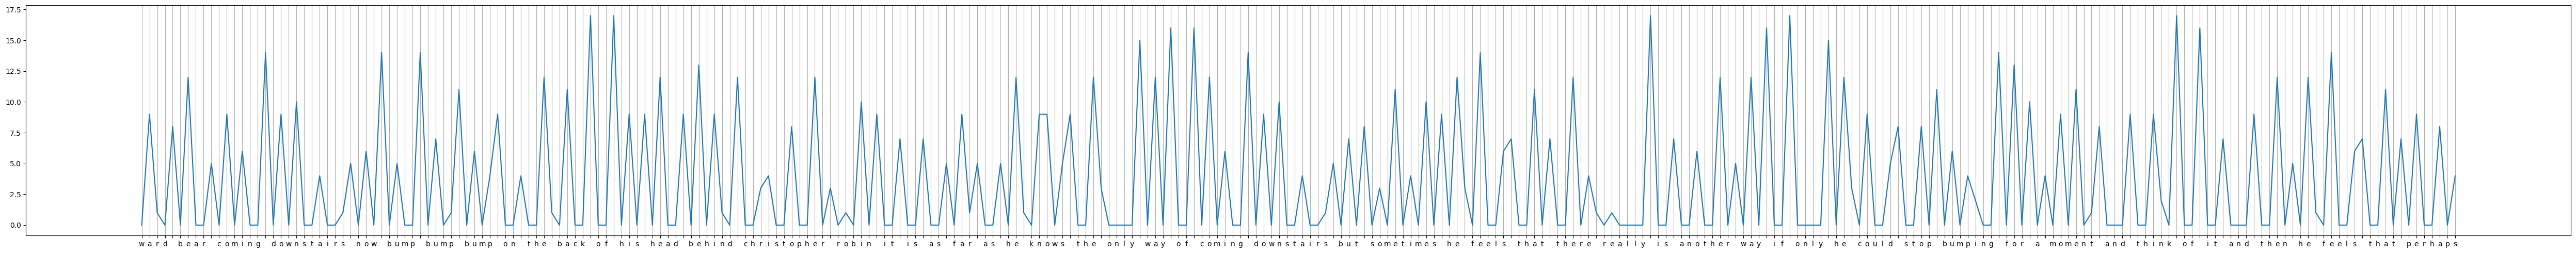

In [113]:
begin = 100
length = 400

arr_TF = np.array(TF, dtype=float)

arr_TF = np.pad(arr_TF, (1, 0))[:-1] - arr_TF
arr_TF[arr_TF > 0] = 0
arr_TF = np.abs(arr_TF)

arr_TF = arr_TF[begin:length]

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
axs.plot(np.arange(arr_TF.size), arr_TF)
axs.xaxis.set_ticks(np.arange(len(input_str[begin:length])) ,input_str[begin:length])
axs.xaxis.grid(True)

plt.show()

In [114]:
# train
max_index_L1 = 4

index_by_prev_L1: dict[str, dict] = {}
StatsDict_L1: dict[str, dict] = {}

StatsDict, index_by_prev_L1 = predict_train(letters=letters, input_str=input_str, max_index=max_index_L1)

ValueError: too many values to unpack (expected 2)

In [ ]:
from collections import Counter


def predict(input_str, TF: list, StatsDict: dict, index_by_prev: dict, max_index, err=0,):
    indexes = [x for x in range(1, max_index+1)]

    output = []

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            continue

        all_indexes_prd_symbols = Counter({})
        prd_symbols_per_index = []

        for index in indexes:
            stats_key = inp + str(index)
            prd_symbols = StatsDict.get(stats_key)

            if not prd_symbols:
                print(f'not prd_symbol: {inp=} {index=} {prd_symbols=}')
                continue

            print(f'{inp=} {index=} {prd_symbols=}')
            all_indexes_prd_symbols += Counter(prd_symbols)
            prd_symbols_per_index.append(prd_symbols)

        print(f'{all_indexes_prd_symbols=}')
        stl = np.array(list(all_indexes_prd_symbols.values()))
        # tf = len(list(all_indexes_prd_symbols.keys()))
        tf = np.sum(np.abs(stl - stl[np.newaxis].T))

        TF.append(tf)

        prd_symbol = max(all_indexes_prd_symbols, key=all_indexes_prd_symbols.get)
        prd_symbol_stats = all_indexes_prd_symbols[prd_symbol]

        next_inp = input_str[inp_idx + 1]
        print(f'{inp_idx=} {inp=} | {prd_symbol=} {next_inp=} {prd_symbol_stats=}')

        if prd_symbol != next_inp:
            err += 1

        output.append(prd_symbol)

        prev_indexes = []
        for idx, prd_symbols in enumerate(prd_symbols_per_index):
            if prd_symbols.__contains__(next_inp):
                prev_indexes.append(idx + 1)

        print(f'{prev_indexes=}')

        # recurtion
        indexes = []
        for prev_index in prev_indexes:
            by_prev_key = inp + str(prev_index) + ':' + next_inp
            next_index = index_by_prev.get(by_prev_key)

            if not next_index:
                continue
            
            print(f'{next_index}')
            indexes.extend(list(next_index.keys()))

        indexes = list(set(indexes))
        print('next indexes', indexes)
        
        if len(indexes) <= 0:
            indexes = [x for x in range(1, max_index+1)]

        print()
        
    output.insert(0, input_str[0])

    return TF, err, output


In [ ]:
# predict
TF = []

TF, err, out_L1 = predict(input_str=input_str, TF=TF, StatsDict=StatsDict, index_by_prev=index_by_prev_L1, max_index=max_index_L1)

print(err, err / (len(input_str) / 100) )

not prd_symbol: inp='c' index=1 prd_symbols=None
not prd_symbol: inp='c' index=2 prd_symbols=None
not prd_symbol: inp='c' index=3 prd_symbols=None
not prd_symbol: inp='c' index=4 prd_symbols=None
all_indexes_prd_symbols=Counter()


ValueError: max() arg is an empty sequence